In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from math import sqrt
%matplotlib inline
sns.set(style="darkgrid")

### 1. Классификация. Датасет тяжесть заболеваемости ковидом в зависимости от симптомов. Метрика качества RMSE (?)

In [15]:
data = pd.read_csv("4labDataCovidClassification.csv")

In [16]:
data.shape

(316800, 27)

### 2. Препроцессинг данных

In [17]:
data.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country'],
      dtype='object')

#### Severity_Mild (незначительная тяжесть), Severity_Moderate (средняя тяжесть), Severity_None (не болеет), Severity_Severe (тяжелая форма болезни)

In [18]:
data.drop(columns=["Country"], inplace=True)
# data = data.drop_duplicates()

### 2*. Посмотрим на корреляцию данных. Можно заметить возмущения в первых столбцах, некоторые симптомы ведут за собой другие.

<AxesSubplot:>

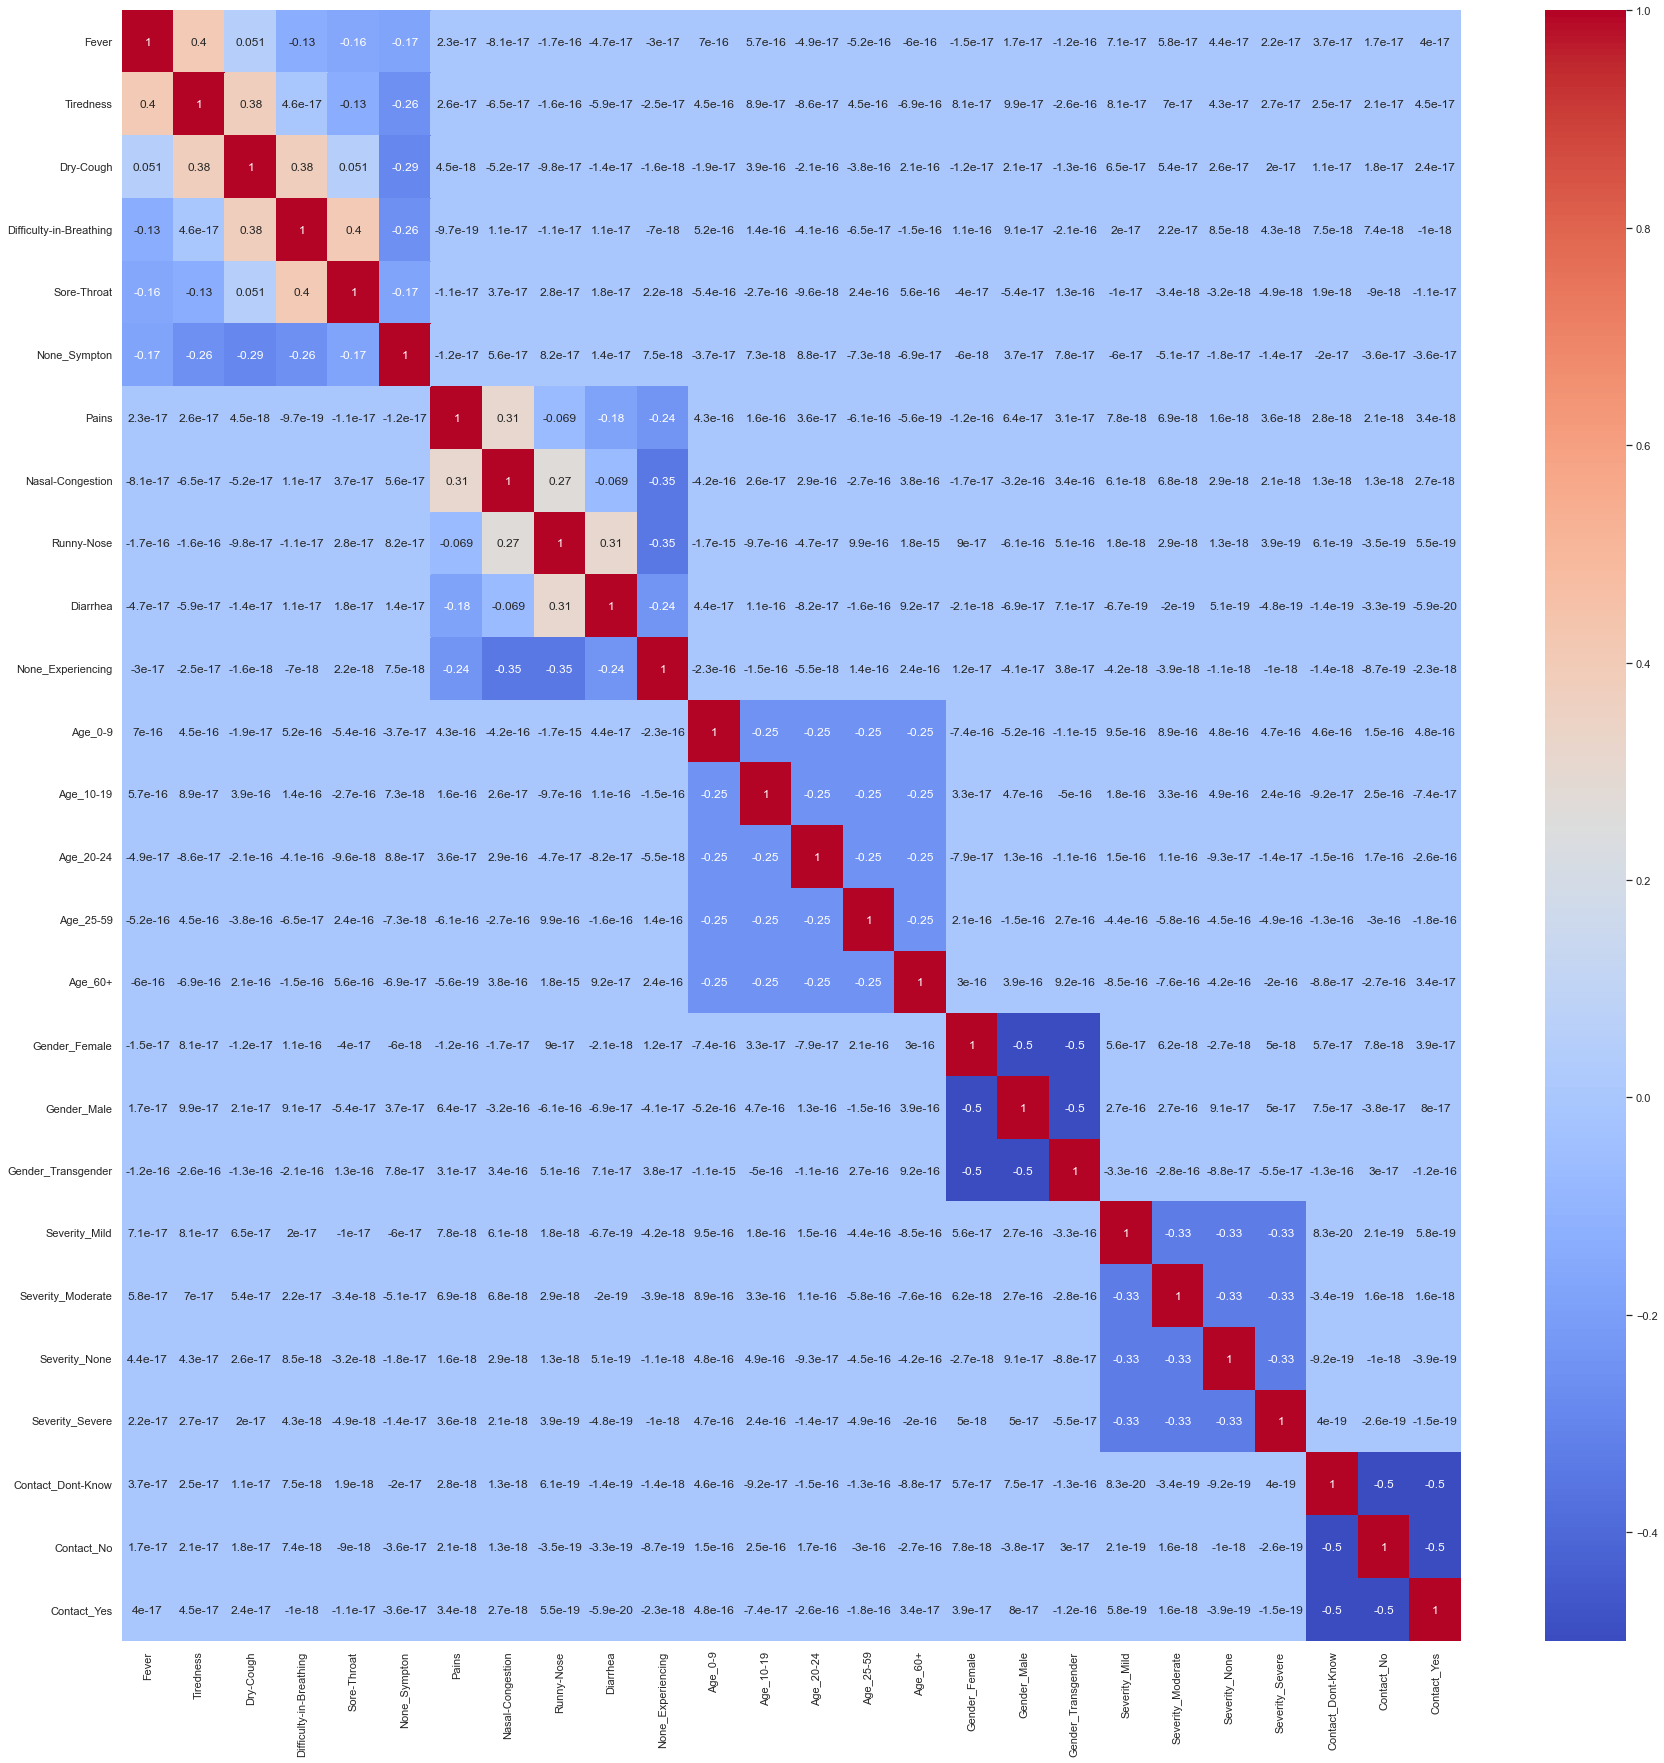

In [19]:
figure = plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

### 3. Реализация метрики качества. \\ аргументировать выбор метрики качества 

### Разбиение на обучающую и тестовую выборки

In [36]:
indicators = ['Fever', 'Tiredness', 'Dry-Cough',  'Difficulty-in-Breathing', 'Sore-Throat', 'Pains', 'Nasal-Congestion',
              'Runny-Nose', 'Diarrhea', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Male',
              'Gender_Female', 'Gender_Transgender']

target_columns = ['Severity_None']

X = data[indicators]
y = data[target_columns]

In [37]:
# cols = ['Severity_Mild', 'Severity_Moderate', 'Severity_None', 'Severity_Severe']
# mapcols = {'Severity_Mild':0,'Severity_Moderate':1,'Severity_None':2,'Severity_Severe':3}
# y = data[cols].idxmax(axis=1).map(mapcols)
# X = data.drop(columns=cols)

In [38]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=10)

In [40]:
X_train.shape, X_test.shape

((126720, 17), (190080, 17))

### 4. Реализовать и обучить логистическую регрессию или линейную регрессию \\ !!!не разрешается использовать sklearn!!!

In [31]:
class LR:
    def __init__(self, step=10**-2, it_c=50):
        self.step = step
        self.it_c = it_c

    def get_coeff(self, x, y):
        err = 0
        x = x.to_numpy()
        y = y.to_numpy()
        
        for i in range(len(y)): 
            if self.predict(x[i]) == y[i]:
                err += 1
        return err / len(y)
    
    def fit(self, x, y):
#         x = x.to_numpy()
        y = y.to_numpy()
        np.c_[x, np.ones(len(x))] 
        self.w = np.zeros(x.shape[1])
        
        for i in range(self.it_c):
            z = [sum([x[i][j]*self.w[j] for j in range(len(x[i]))]) for i in range(len(x))]
            res = np.array([1 / (1 + np.exp(-a)) for a in z])
            grad = np.dot(x.T, res - y) / y.size
            self.w -= self.step * grad
    def predict(self, x):
        np.append(x,1)
        return (1 / (1 + np.exp(-np.dot(x, self.w)))).round()

In [32]:
mlg = LR()
hist = mlg.fit(X_train, y_train)
print(f"моя LogReg: {mlg.get_coeff(X_test, y_test)}")

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [28]:
from sklearn.linear_model import LogisticRegression
sklg = LogisticRegression()
sklg.fit(X_train, y_train)
print(f"sklearn: {sklg.score(X_test, y_test)}")

sklearn: 0.24659090909090908


In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.1840540824915825

### 4*. Добавить регуляризацию \\ не разрешается использовать sklearn

### 5. Оценить качество модели на обучающей и тестовой выборках \\ не разрешается использовать sklearn

### 5*. Сделать график ошибки модели на обучающей и тестовой выборках 
### 5*. Сделать график точности модели на обучающей и тестовой выборках

### 6. Обучить логистическую регрессию или линейную регрессию из sklearn, оценить качество модели на обучающей и тестовой выборках и сравнить со своей моделью

### 6*. Сделать график ошибки модели из sklearn на обучающей и тестовой выборках и сравнить со своей моделью
### 6*. Сделать график точности модели из sklearn на обучающей и тестовой выборках и сравнить со своей моделью